## Este notebook tem como objetivo apresentar os resultados obtidos no PIBIC

In [2]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from tqdm.notebook import tqdm

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['text.usetex'] = False

figurePath = r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'
path_data_Silas_Desktop = r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic'

In [4]:
def loadArray(file_path_prefix, num_files, file_path_suffix, flag_mean=False):
    
    data_list = []
    
    for i in range(num_files):
        file_path = f"{file_path_prefix}{i}{file_path_suffix}"
        with open(file_path, 'rb') as stream:
            data = np.load(stream)
            data_list.append(data)
    
    if flag_mean:
        data = np.mean(data_list, axis=0)
        return data
    
    else:
        return data_list

In [5]:
num_files = 5 # Número de arquivos a serem carregados

# CSPR 
for indfile in range(0, num_files):
    CSPR_BER_PERMUTADO = loadArray(path_data_Silas_Desktop+'\CSPR_BER_SpS_4_128_Sample_', indfile, '_DataPermuted.npy', True)
    CSPR_SER_PERMUTADO = loadArray(path_data_Silas_Desktop+'\CSPR_SER_SpS_4_128_Sample_', indfile, '_DataPermuted.npy', True)
    CSPR_SNR_PERMUTADO = loadArray(path_data_Silas_Desktop+'\CSPR_SNR_SpS_4_128_Sample_', indfile, '_DataPermuted.npy', True) 
    CSPR_SIR_PERMUTADO = loadArray(path_data_Silas_Desktop+'\CSPR_SIR_SpS_4_128_Sample_', indfile, '_DataPermuted.npy', True)

# CSPR dos resultados parciais como forma de comparação
for indfile in range(0, num_files):
    CSPR_BER_PARCIAL = loadArray(path_data_Silas_Desktop+'\CSPR_BER_SpS_4_128_Sample_', indfile, '_outlier.npy', True)
    CSPR_SER_PARCIAL = loadArray(path_data_Silas_Desktop+'\CSPR_SER_SpS_4_128_Sample_', indfile, '_outlier.npy', True)
    CSPR_SNR_PARCIAL = loadArray(path_data_Silas_Desktop+'\CSPR_SNR_SpS_4_128_Sample_', indfile, '_outlier.npy', True) 
    CSPR_SIR_PARCIAL = loadArray(path_data_Silas_Desktop+'\CSPR_SIR_SpS_4_128_Sample_', indfile, '_outlier.npy', True)  

## Resultados Variando o CSPR (Conjunto de treinamento permutado)

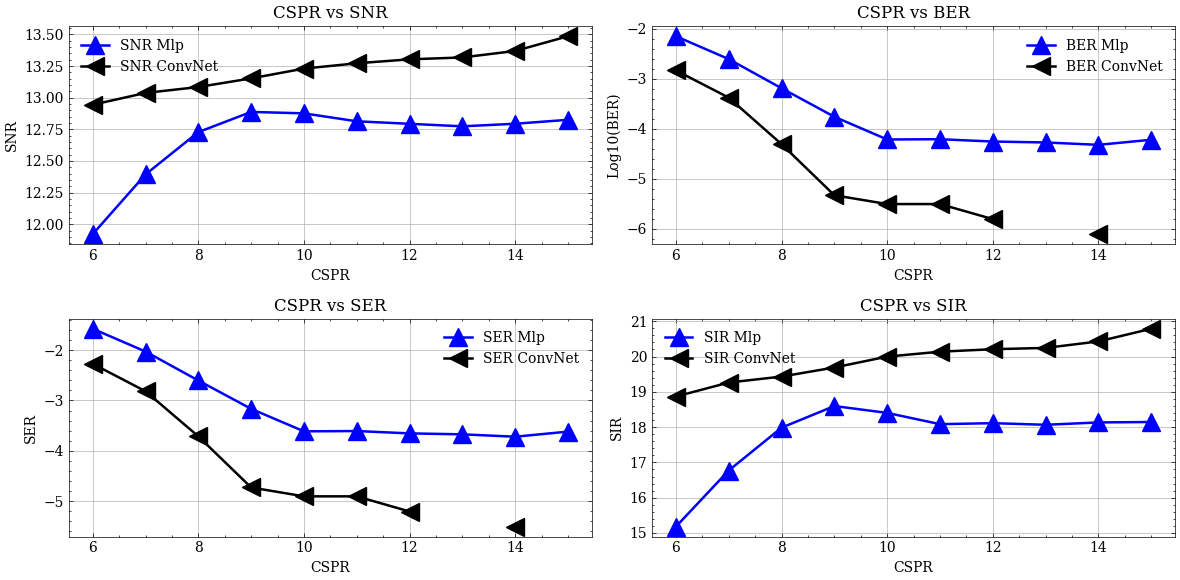

In [43]:
savePlots = False
loPower = np.arange(6,16,1)
markersize = 12.5
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

data = [
    (CSPR_SNR_PERMUTADO, 'SNR', 'CSPR vs SNR', 'SNR KK', 'SNR Mlp', 'SNR ConvNet'),
    (CSPR_BER_PERMUTADO, 'Log10(BER)', 'CSPR vs BER', 'BER KK', 'BER Mlp', 'BER ConvNet'),
    (CSPR_SER_PERMUTADO, 'SER', 'CSPR vs SER', 'SER KK', 'SER Mlp', 'SER ConvNet'),
    (CSPR_SIR_PERMUTADO, 'SIR', 'CSPR vs SIR', 'SIR KK', 'SIR Mlp', 'SIR ConvNet')
]

for i, ax in enumerate(axs.flat):
    data_to_plot, y_label, title, label1, label2, label3 = data[i]
    
    if y_label in ['SNR', 'SIR']:
        #ax.plot(loPower, 10*np.log10(data_to_plot[0, :]), color='red', marker='o', markersize=markersize, label=label1)
        ax.plot(loPower, 10*np.log10(data_to_plot[1, :]), color='blue', marker='^', markersize=markersize, label=label2)
        ax.plot(loPower, 10*np.log10(data_to_plot[2, :]), color='black', marker='<', markersize=markersize, label=label3)
    
    else:
        #ax.plot(loPower, np.log10(data_to_plot[0, :]), color='red', marker='o', markersize=markersize, label=label1)
        ax.plot(loPower, np.log10(data_to_plot[1, :]), color='blue', marker='^', markersize=markersize, label=label2)
        ax.plot(loPower, np.log10(data_to_plot[2, :]), color='black', marker='<', markersize=markersize, label=label3)
    
    ax.set_xlabel('CSPR')
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()
    ax.grid()

plt.tight_layout()

if savePlots:
     plt.savefig(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'+'\CSPR_Results.png', dpi=600)

## Compara os resultados parciais com os resultados permutados

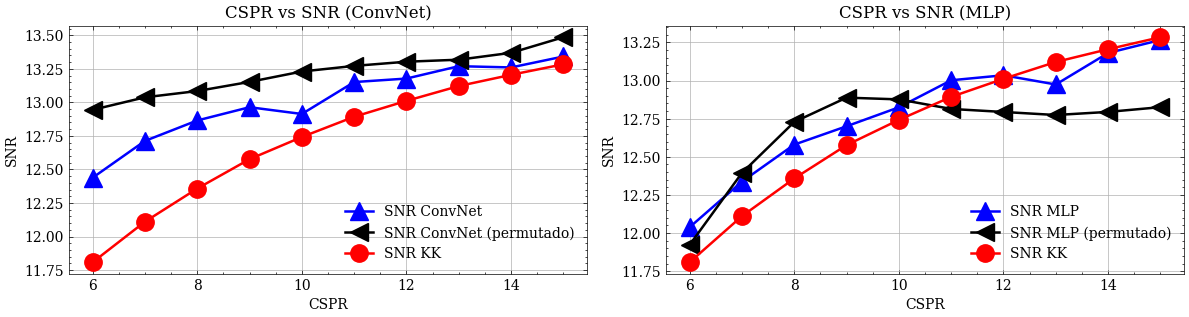

In [37]:
# Comparação dos modelos 

savePlots = False
loPower = np.arange(6,16,1)
markersize = 12.5

plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(loPower, 10*np.log10(CSPR_SNR_PARCIAL[2,:]), color='blue', marker='^', markersize=markersize, label='SNR ConvNet')
plt.plot(loPower, 10*np.log10(CSPR_SNR_PERMUTADO[2,:]), color='black', marker='<', markersize=markersize, label='SNR ConvNet (permutado)')
plt.plot(loPower, 10*np.log10(CSPR_SNR_PARCIAL[0,:]), color='red', marker='o', markersize=markersize, label='SNR KK')
plt.xlabel('CSPR')
plt.ylabel('SNR')
plt.title('CSPR vs SNR (ConvNet)')
plt.legend()
plt.grid()

graphic02 = plt.subplot(2, 2, 2)
plt.plot(loPower, 10*np.log10(CSPR_SNR_PARCIAL[1,:]), color='blue', marker='^', markersize=markersize, label='SNR MLP')
plt.plot(loPower, 10*np.log10(CSPR_SNR_PERMUTADO[1,:]), color='black', marker='<', markersize=markersize, label='SNR MLP (permutado)')
plt.plot(loPower, 10*np.log10(CSPR_SNR_PARCIAL[0,:]), color='red', marker='o', markersize=markersize, label='SNR KK')
plt.xlabel('CSPR')
plt.ylabel('SNR')
plt.title('CSPR vs SNR (MLP)')
plt.legend()
plt.grid()

plt.tight_layout()

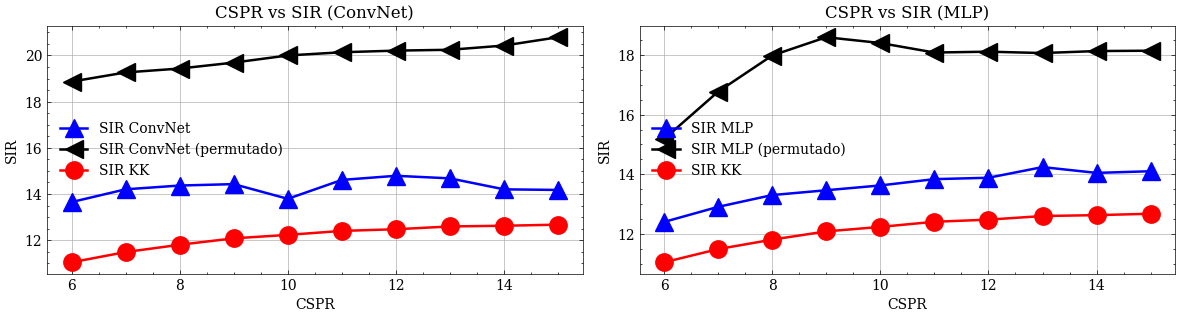

In [38]:
plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(loPower, 10*np.log10(CSPR_SIR_PARCIAL[2,:]), color='blue', marker='^', markersize=markersize, label='SIR ConvNet')
plt.plot(loPower, 10*np.log10(CSPR_SIR_PERMUTADO[2,:]), color='black', marker='<', markersize=markersize, label='SIR ConvNet (permutado)')
plt.plot(loPower, 10*np.log10(CSPR_SIR_PARCIAL[0,:]), color='red', marker='o', markersize=markersize, label='SIR KK')
plt.xlabel('CSPR')
plt.ylabel('SIR')
plt.title('CSPR vs SIR (ConvNet)')
plt.legend()
plt.grid()

graphic02 = plt.subplot(2, 2, 2)
plt.plot(loPower, 10*np.log10(CSPR_SIR_PARCIAL[1,:]), color='blue', marker='^', markersize=markersize, label='SIR MLP')
plt.plot(loPower, 10*np.log10(CSPR_SIR_PERMUTADO[1,:]), color='black', marker='<', markersize=markersize, label='SIR MLP (permutado)')
plt.plot(loPower, 10*np.log10(CSPR_SIR_PARCIAL[0,:]), color='red', marker='o', markersize=markersize, label='SIR KK')
plt.xlabel('CSPR')
plt.ylabel('SIR')
plt.title('CSPR vs SIR (MLP)')
plt.legend()
plt.grid()

plt.tight_layout()

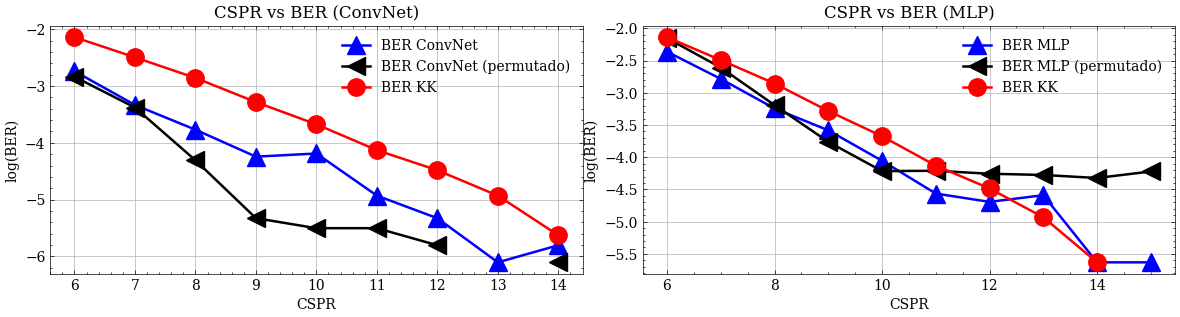

In [42]:
plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(loPower, np.log10(CSPR_BER_PARCIAL[2,:]), color='blue', marker='^', markersize=markersize, label='BER ConvNet')
plt.plot(loPower, np.log10(CSPR_BER_PERMUTADO[2,:]), color='black', marker='<', markersize=markersize, label='BER ConvNet (permutado)')
plt.plot(loPower, np.log10(CSPR_BER_PARCIAL[0,:]), color='red', marker='o', markersize=markersize, label='BER KK')
plt.xlabel('CSPR')
plt.ylabel('log(BER)')
plt.title('CSPR vs BER (ConvNet)')
plt.legend()
plt.grid()

graphic02 = plt.subplot(2, 2, 2)
plt.plot(loPower, np.log10(CSPR_BER_PARCIAL[1,:]), color='blue', marker='^', markersize=markersize, label='BER MLP')
plt.plot(loPower, np.log10(CSPR_BER_PERMUTADO[1,:]), color='black', marker='<', markersize=markersize, label='BER MLP (permutado)')
plt.plot(loPower, np.log10(CSPR_BER_PARCIAL[0,:]), color='red', marker='o', markersize=markersize, label='BER KK')
plt.xlabel('CSPR')
plt.ylabel('log(BER)')
plt.title('CSPR vs BER (MLP)')
plt.legend()
plt.grid()

plt.tight_layout()

In [ ]:
# Dados para as métricas de CSPR
#CSPR_BER = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_0_AWGN_debug.npy')
#CSPR_SNR = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_0_AWGN_debug.npy')
#CSPR_SIR = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_0_AWGN_debug.npy')
#CSPR_SER = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_0_AWGN_debug.npy') 

#CSPR_BER_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_0_AWGN_TRAIN.npy')
#CSPR_SNR_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_0_AWGN_TRAIN.npy')
#CSPR_SIR_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_0_AWGN_TRAIN.npy')
#CSPR_SER_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_0_AWGN_TRAIN.npy') 

### Resultados para canal AWGN para diferentes variações de CSPR 

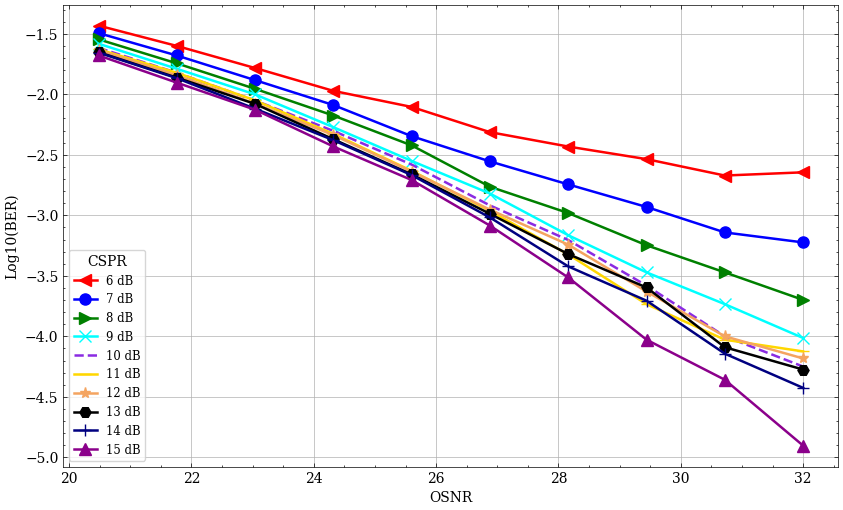

In [7]:
loPower = np.arange(6,16,1)
SNR_values = np.arange(16,26,1)
OSNR = ((1*32e9)/(2*12.5e9))*SNR_values

plt.figure(figsize=(10,6))

labels = ['-<', '-o', '->', '-x', '--', '-_', '-*', '-H', '-+', '-^']
colors = ['red', 'blue', 'green', 'aqua', 'blueviolet', 'gold', 'sandybrown', 'black', 'navy', 'darkmagenta']

for index, indCSPR in enumerate(loPower):
    plt.plot(OSNR, np.log10(CSPR_BER_2[:,index][0]), labels[index], markersize=8, color = colors[index], label=str(indCSPR)+' dB')

plt.legend(title="CSPR", loc=3, fontsize='small', frameon=True);
#plt.text(26.5,-0.5,'Conv-Rx 3', fontsize = 14, bbox=dict(facecolor='white', alpha=0.5))
#plt.title('ConvNet Receiver');
plt.xlabel('OSNR');
plt.ylabel('Log10(BER)');
plt.grid();

## Comparação com o modelo convolucional testado com um conjunto de treinamento permutado

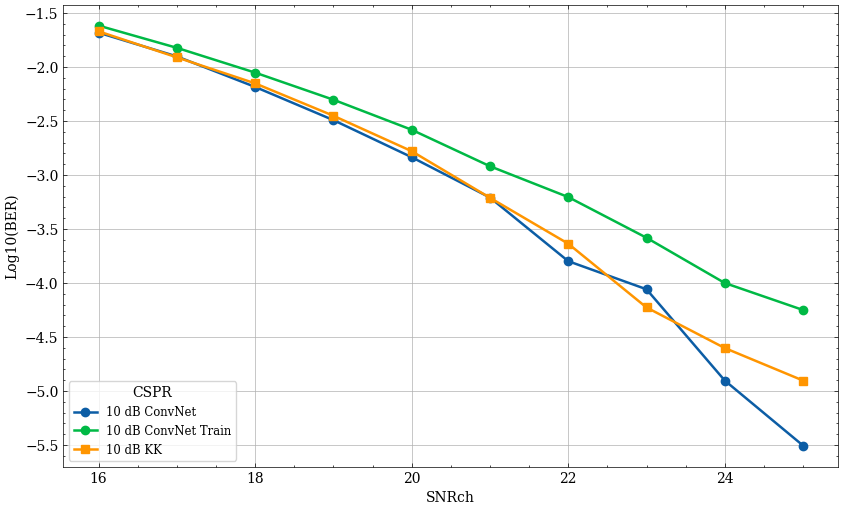

In [22]:
plt.figure(figsize=(10,6))

plt.plot(SNR_values, np.log10(CSPR_BER[:,4][2]), '-o', label='10 dB ConvNet')
plt.plot(SNR_values, np.log10(CSPR_BER_2[:,4][0]), '-o', label='10 dB ConvNet Train')
#plt.plot(OSNR, np.log10(CSPR_BER[:,1][1]), '-x', label='7 dB MLP')
plt.plot(SNR_values, np.log10(CSPR_BER[:,4][0]), '-s', label='10 dB KK')

plt.legend(title="CSPR", loc=3, fontsize='small', frameon=True);
#plt.text(26.5,-0.5,'Conv-Rx 3', fontsize = 14, bbox=dict(facecolor='white', alpha=0.5))
#plt.title('ConvNet Receiver');
plt.xlabel('SNRch');
plt.ylabel('Log10(BER)');
plt.grid();